## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import radians, cos, sin, asin, sqrt

# Exploration

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
data['id'].nunique()

21420

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


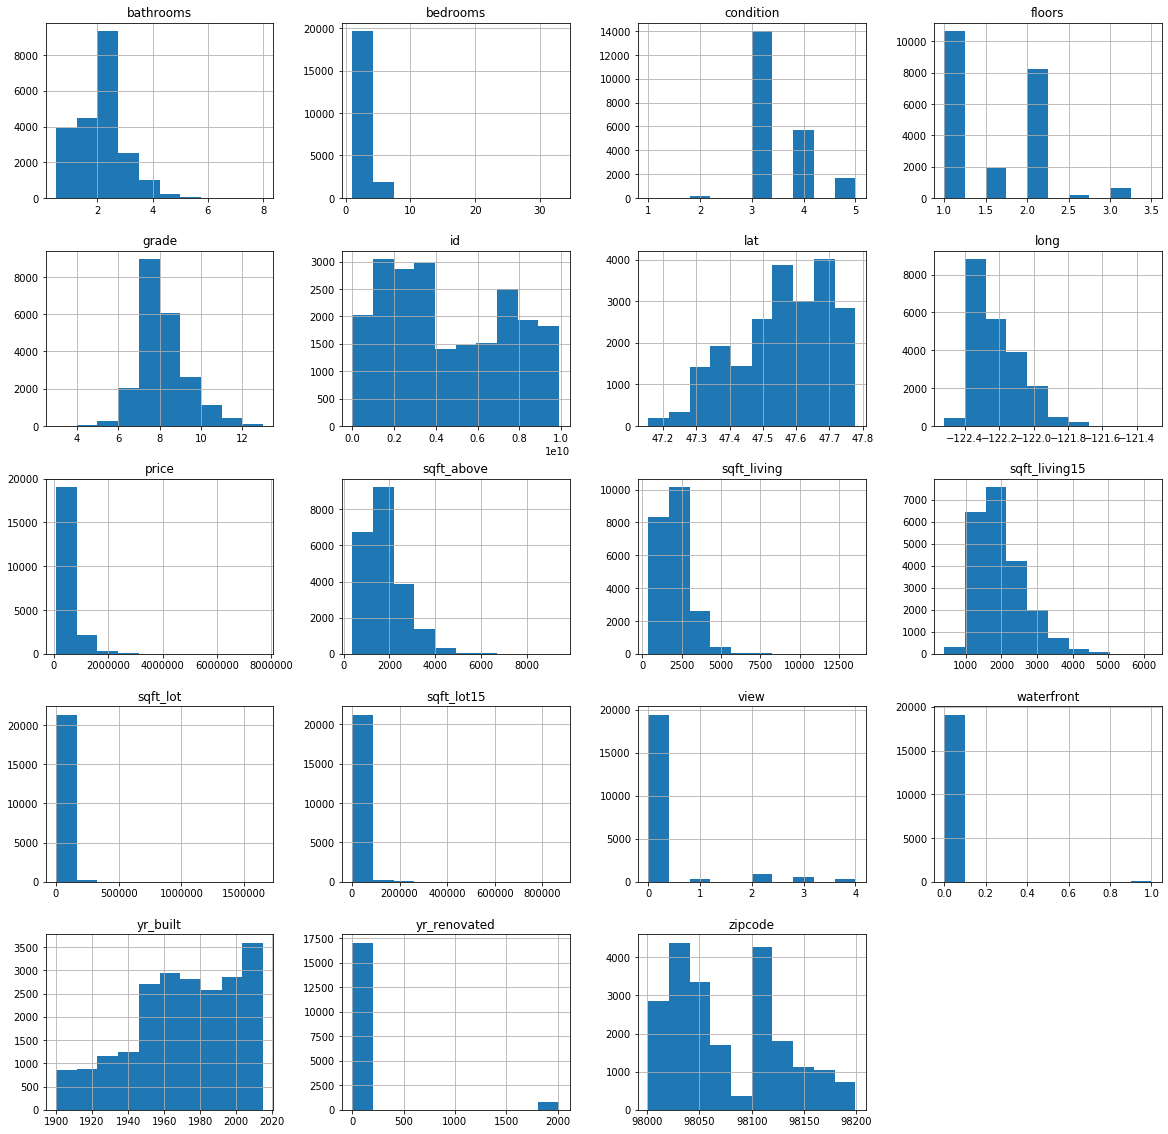

In [6]:
data.hist(figsize=(20,20));

Based on the skews in some of these distributions it seems likely that there are outliers in price, bedrooms, sqft_above, sqft_living, sqft_lot, sqft_lot15. 

Additionally, there are several binomial distributions that should be converted to categorical data. 

During the cleaning process I will also assess the relationship between each independent variable and the dependent variable.

# Cleaning

### Address Outliers

#### Independent Variable- Price

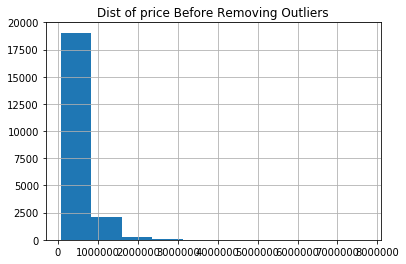

In [7]:
plt.title('Dist of price Before Removing Outliers')
data['price'].hist();

In [8]:
price_cutoff = data['price'].quantile(.925)
price_cutoff

975000.0

In [9]:
data[data['price']>price_cutoff]['price'].describe()

count    1.600000e+03
mean     1.490721e+06
std      6.203572e+05
min      9.760000e+05
25%      1.100000e+06
50%      1.300000e+06
75%      1.650000e+06
max      7.700000e+06
Name: price, dtype: float64

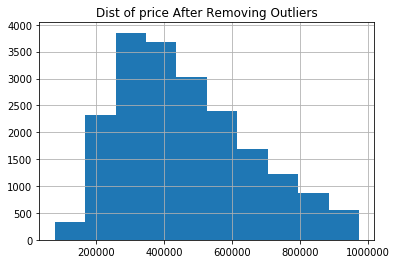

In [10]:
plt.title('Dist of price After Removing Outliers')
data[data['price']<price_cutoff]['price'].hist();

- Outliers Dropped: Houses that sold for more than $975,000 (7.5% of the total data, 1,600 entries)

#### Bedrooms

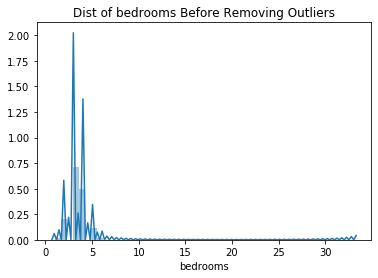

In [11]:
plt.title('Dist of bedrooms Before Removing Outliers')
sns.distplot(data['bedrooms'])
plt.show();

In [12]:
bedrooms_cutoff = 6
data[data['bedrooms']>bedrooms_cutoff].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,57.0,62.000000,62.000000,62.000000,62.000000,62.000000,48.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,4.288724e+09,9.597583e+05,8.032258,3.653226,3851.774194,15790.177419,1.750000,0.0,0.387097,3.451613,8.225806,2953.225806,1957.322581,250.291667,98085.693548,47.617960,-122.255016,2259.161290,12233.903226
std,2.805883e+09,7.185474e+05,3.363096,1.345419,1756.741137,38701.662780,0.548844,0.0,0.947037,0.693705,1.475698,1394.510049,31.689981,669.225591,49.417787,0.085319,0.102465,841.537434,27605.414463
min,2.630003e+08,2.800000e+05,7.000000,1.000000,1620.000000,2400.000000,1.000000,0.0,0.000000,3.000000,6.000000,1040.000000,1901.000000,0.000000,98004.000000,47.319100,-122.392000,1240.000000,1552.000000
25%,1.904350e+09,5.392500e+05,7.000000,2.750000,2822.500000,5470.500000,1.125000,0.0,0.000000,3.000000,7.000000,2010.000000,1929.750000,0.000000,98040.000000,47.573750,-122.326250,1580.000000,4402.500000
50%,3.590980e+09,7.000000e+05,7.000000,3.500000,3465.000000,8572.500000,2.000000,0.0,0.000000,3.000000,8.000000,2675.000000,1962.000000,0.000000,98105.000000,47.630850,-122.292500,2035.000000,7517.000000
75%,6.671850e+09,9.867500e+05,8.000000,4.250000,4330.000000,12514.000000,2.000000,0.0,0.000000,4.000000,9.000000,3462.500000,1978.750000,0.000000,98117.000000,47.672000,-122.187750,2725.000000,10301.250000
max,9.822700e+09,3.300000e+06,33.000000,8.000000,13540.000000,307752.000000,3.500000,0.0,4.000000,5.000000,12.000000,9410.000000,2013.000000,2013.000000,98199.000000,47.756500,-121.986000,4850.000000,217800.000000


33 bedrooms in a 1620 sqft house seems like it was likely a typo. I'll impute 3 as the number of rooms.  

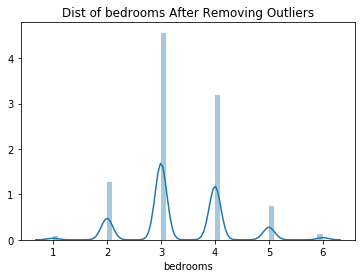

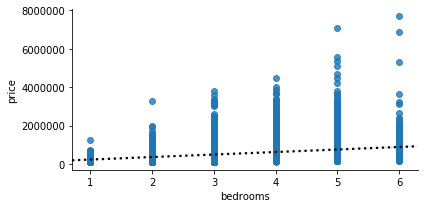

In [13]:
data.loc[data['bedrooms']==33, 'bedrooms']=3
no_outs = data[data['bedrooms']<=bedrooms_cutoff]
plt.title('Dist of bedrooms After Removing Outliers')
sns.distplot(no_outs['bedrooms'])
plt.show();
sns.lmplot(x = 'bedrooms', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 6 bedrooms (62 entries)
- Relationship: Observably linear. Potentially better accounted for with polynomial factoring.

#### Bathrooms

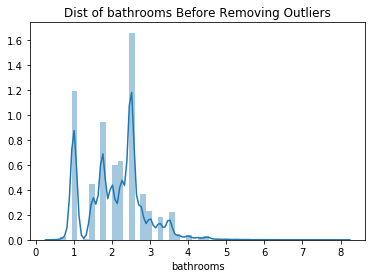

In [14]:
plt.title('Dist of bathrooms Before Removing Outliers')
sns.distplot(data['bathrooms'])
plt.show();

In [15]:
bathrooms_cutoff = data['bathrooms'].quantile(.99)
bathrooms_cutoff

4.25

In [16]:
(data[data['bathrooms']>bathrooms_cutoff]['bathrooms']
 .describe())

count    187.000000
mean       4.902406
std        0.663088
min        4.500000
25%        4.500000
50%        4.500000
75%        5.000000
max        8.000000
Name: bathrooms, dtype: float64

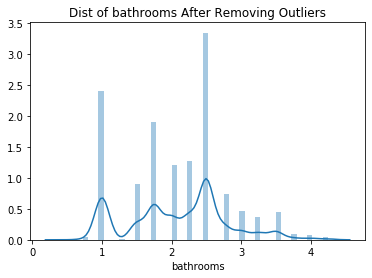

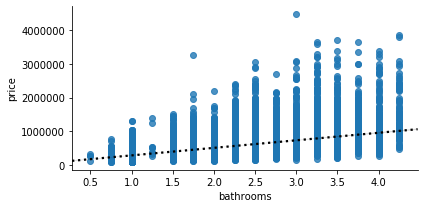

In [17]:
no_outs = data[data['bathrooms']<=bathrooms_cutoff]
plt.title('Dist of bathrooms After Removing Outliers')
sns.distplot(no_outs['bathrooms'])
plt.show();
sns.lmplot(x = 'bathrooms', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 4.25 bathrooms (1% of the data, 187 entries)
- Relationship: Observably linear

#### sqft_living

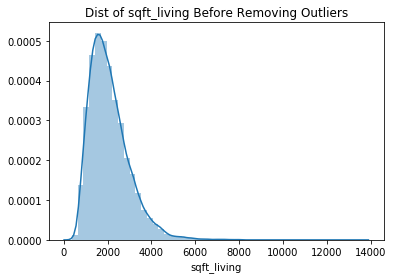

In [18]:
plt.title('Dist of sqft_living Before Removing Outliers')
sns.distplot(data['sqft_living'])
plt.show();

In [19]:
sqft_living_cutoff = data['sqft_living'].quantile(.99)
sqft_living_cutoff

4980.0

In [20]:
(data[data['sqft_living']>sqft_living_cutoff]['sqft_living']
 .describe())

count      215.000000
mean      5965.120930
std       1139.235731
min       5000.000000
25%       5275.000000
50%       5600.000000
75%       6250.000000
max      13540.000000
Name: sqft_living, dtype: float64

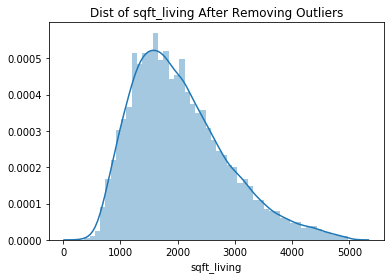

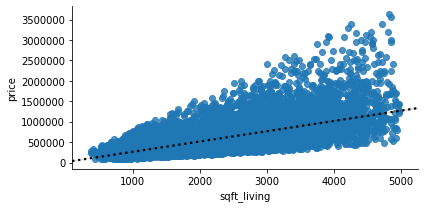

In [21]:
no_outs = data[data['sqft_living']<=sqft_living_cutoff]
plt.title('Dist of sqft_living After Removing Outliers')
sns.distplot(no_outs['sqft_living'])
plt.show();
sns.lmplot(x = 'sqft_living', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 4,980 sqft of living space (1% of the data, 215 entries)
- Relationship: Observably linear. Potentially better accounted for with polynomial factoring.

#### sqft_lot

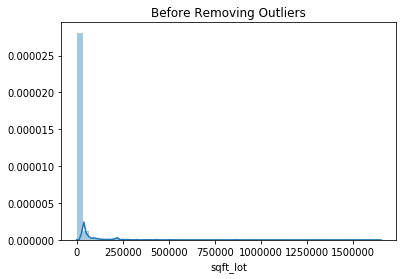

In [22]:
plt.title('Before Removing Outliers')
sns.distplot(data['sqft_lot'])
plt.show();

In [23]:
sqft_lot_cutoff = data['sqft_lot'].quantile(.85)
sqft_lot_cutoff

15000.0

In [24]:
(data[data['sqft_lot']>sqft_lot_cutoff]['sqft_lot']
 .describe())

count    3.239000e+03
mean     6.119121e+04
std      9.425524e+04
min      1.500100e+04
25%      1.906000e+04
50%      3.210900e+04
75%      5.357800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

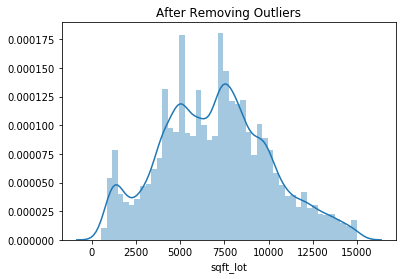

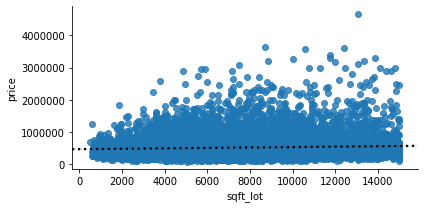

In [25]:
no_outs = data[data['sqft_lot']<=sqft_lot_cutoff]
plt.title('After Removing Outliers')
sns.distplot(no_outs['sqft_lot'])
plt.show();
sns.lmplot(x = 'sqft_lot', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 15000 sqft lots (15% of the data, 3239 entries)
- Relationship: No observable relationship.

#### floors

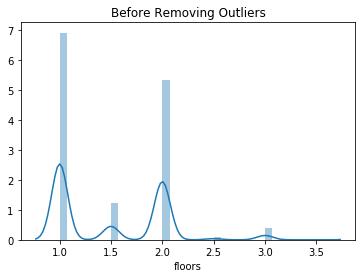

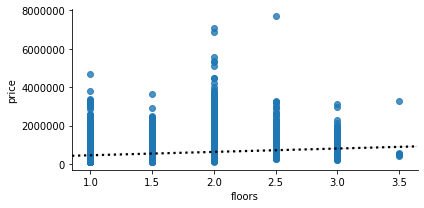

In [26]:
plt.title('Before Removing Outliers')
sns.distplot(data['floors'])
plt.show();
sns.lmplot(x = 'floors', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: potentially polynomial, with a peak at 2 floors.

#### waterfront

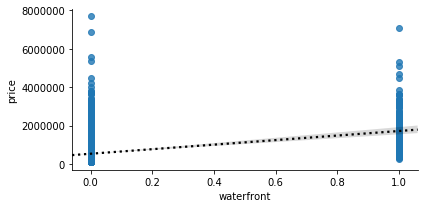

In [27]:
sns.lmplot(x = 'waterfront', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: Observably Linear.

#### view

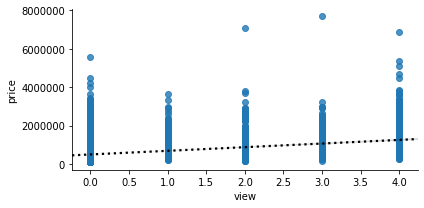

In [28]:
sns.lmplot(x = 'view', y = 'price', data=data, 
           height=3, aspect= 2, 
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

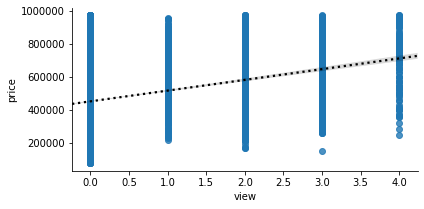

In [29]:
affordable = data[data['price']<=price_cutoff]
sns.lmplot(x = 'view', y = 'price', data=affordable,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

After accounting for price outliers, relationship is observably linear.

#### condition

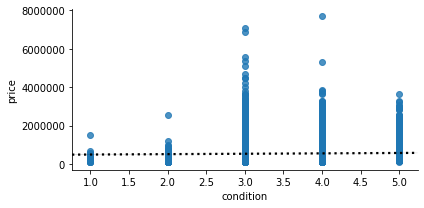

In [30]:
sns.lmplot(x = 'condition', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

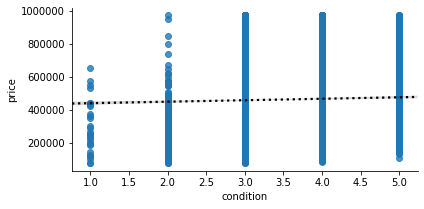

In [31]:
sns.lmplot(x = 'condition', y = 'price', data=affordable,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

Relationship: No observable relationship.

#### grade

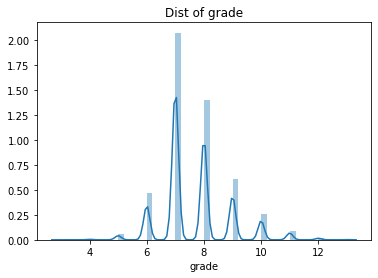

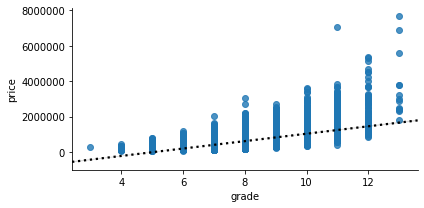

In [32]:
plt.title('Dist of grade')
sns.distplot(data['grade'])
plt.show();
sns.lmplot(x = 'grade', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: Observably linear. Potentially better accounted for with polynomial factoring.

#### sqft_above

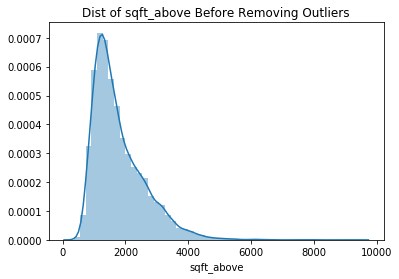

In [33]:
plt.title('Dist of sqft_above Before Removing Outliers')
sns.distplot(data['sqft_above'])
plt.show();

In [34]:
sqft_above_cutoff = data['sqft_above'].quantile(.99)
sqft_above_cutoff

4370.0

In [35]:
(data[data['sqft_above']>sqft_above_cutoff]['sqft_above']
 .describe())

count     215.000000
mean     5118.995349
std       854.818894
min      4380.000000
25%      4565.000000
50%      4830.000000
75%      5370.000000
max      9410.000000
Name: sqft_above, dtype: float64

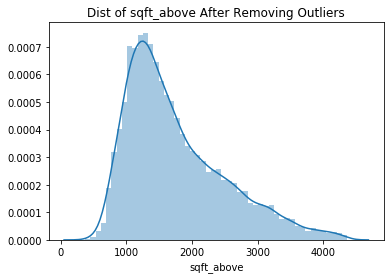

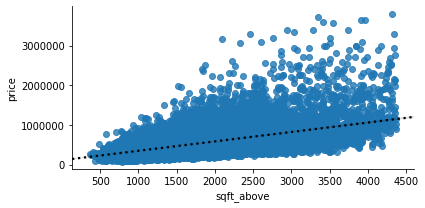

In [36]:
no_outs = data[data['sqft_above']<=sqft_above_cutoff]
plt.title('Dist of sqft_above After Removing Outliers')
sns.distplot(no_outs['sqft_above'])
plt.show();
sns.lmplot(x = 'sqft_above', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: Houses with more than 4370 sqft of living space above ground. (1% of the data, 215 entries)
- Relationship: Observably linear. Potentially better accounted for with polynomial factoring.

#### sqft_basement

In [37]:
#Trying to convert sqft_basement to float called an error.
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1135.0        1
704.0         1
3000.0        1
176.0         1
2190.0        1
Name: sqft_basement, Length: 304, dtype: int64

The ? in the sqft_basement column won't work. I'll use the other data I have to deduce the values for this column. 

In [38]:
data['sqft_basement']=(data['sqft_living']-data['sqft_above'])
data['sqft_basement'].describe()

count    21597.000000
mean       291.725008
std        442.667800
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

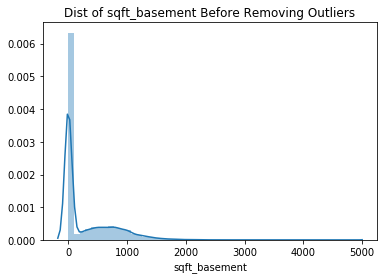

In [39]:
plt.title('Dist of sqft_basement Before Removing Outliers')
sns.distplot(data['sqft_basement'])
plt.show();

In [40]:
sqft_basement_cutoff = data['sqft_basement'].quantile(.995)
sqft_basement_cutoff

1870.0

In [41]:
(data[data['sqft_basement']>
      sqft_basement_cutoff]['sqft_basement'].describe())

count     103.000000
mean     2245.815534
std       452.596880
min      1880.000000
25%      2005.000000
50%      2100.000000
75%      2320.000000
max      4820.000000
Name: sqft_basement, dtype: float64

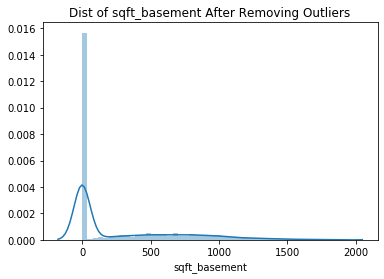

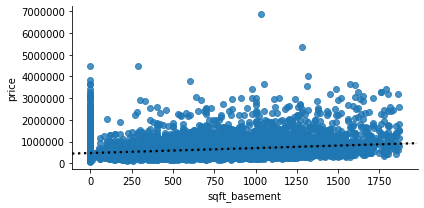

In [42]:
no_outs = data[data['sqft_basement']<=sqft_basement_cutoff]
plt.title('Dist of sqft_basement After Removing Outliers')
sns.distplot(no_outs['sqft_basement'])
plt.show();
sns.lmplot(x = 'sqft_basement', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: houses with basements larger than 1870 sqft. (.5% of the data, 103 entries)
- Relationship: Observably linear, with a skewed distribution toward 0. 

#### lat

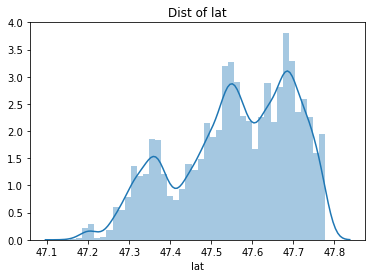

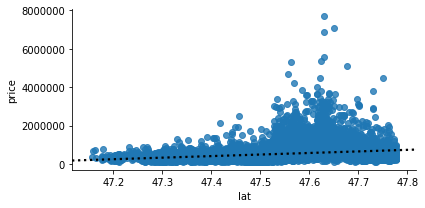

In [43]:
plt.title('Dist of lat')
sns.distplot(data['lat'])
plt.show();
sns.lmplot(x = 'lat', y = 'price', data=data,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: None.
- Relationship: Not observably linear. I will use in feature creation to establish geography based metric.

#### long

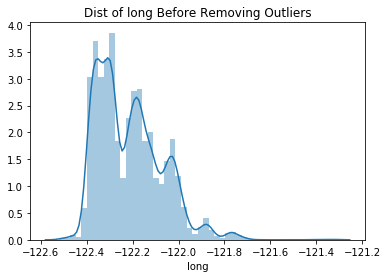

In [44]:
plt.title('Dist of long Before Removing Outliers')
sns.distplot(data['long'])
plt.show();

In [45]:
long_cutoff = data['long'].quantile(.99)
long_cutoff

-121.78299999999999

In [46]:
(data[data['long']>long_cutoff]['long']
 .describe())

count    213.000000
mean    -121.723042
std        0.107914
min     -121.782000
25%     -121.772000
50%     -121.758000
75%     -121.731000
max     -121.315000
Name: long, dtype: float64

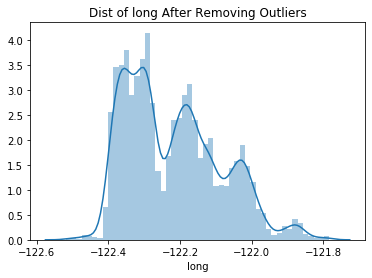

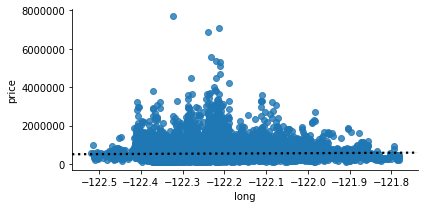

In [47]:
no_outs = data[data['long']<=long_cutoff]
plt.title('Dist of long After Removing Outliers')
sns.distplot(no_outs['long'])
plt.show();
sns.lmplot(x = 'long', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Outliers Dropped: longitudes East of -121.783. (1% of the data, 213 entries)
- Relationship: Not observably linear. I will use in feature creation to establish geography based metric.

#### sqft_living15

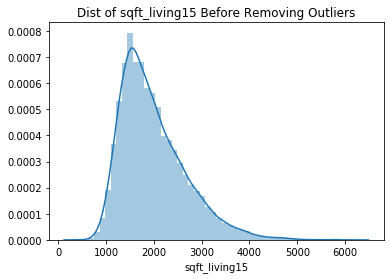

In [48]:
plt.title('Dist of sqft_living15 Before Removing Outliers')
sns.distplot(data['sqft_living15'])
plt.show();

In [49]:
sqft_living15_cutoff = data['sqft_living15'].quantile(.99)
sqft_living15_cutoff

4080.0

In [50]:
(data[data['sqft_living15']>
      sqft_living15_cutoff]['sqft_living15']
 .describe())

count     214.000000
mean     4539.663551
std       414.987685
min      4090.000000
25%      4230.000000
50%      4440.000000
75%      4730.000000
max      6210.000000
Name: sqft_living15, dtype: float64

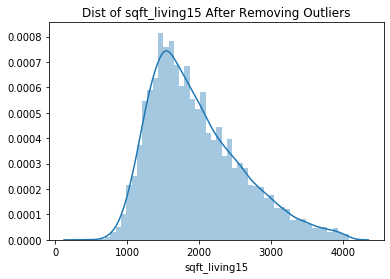

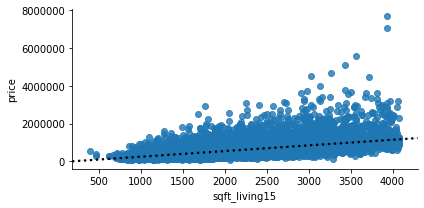

In [51]:
no_outs = data[data['sqft_living15']<=sqft_living15_cutoff]
plt.title('Dist of sqft_living15 After Removing Outliers')
sns.distplot(no_outs['sqft_living15'])
plt.show();
sns.lmplot(x = 'sqft_living15', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Ouliers Dropped: houses where closest 15 neighbors average sqft of living space is greater than 4,080. (1% of data, 214 entries)
- Relationship: Observably linear. Potentially better accounted for with polynomial factoring.

#### sqft_lot15

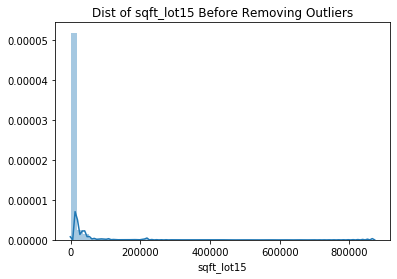

In [52]:
plt.title('Dist of sqft_lot15 Before Removing Outliers')
sns.distplot(data['sqft_lot15'])
plt.show();

In [53]:
sqft_lot15_cutoff = data['sqft_lot15'].quantile(.85)
sqft_lot15_cutoff

13000.0

In [54]:
(data[data['sqft_lot15']>sqft_lot15_cutoff]['sqft_lot15']
 .describe())

count      3234.000000
mean      46487.047928
std       59905.107213
min       13001.000000
25%       15939.250000
50%       24933.000000
75%       43995.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

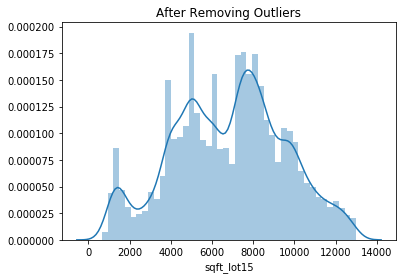

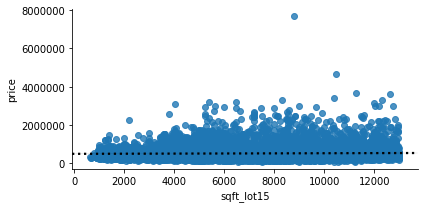

In [55]:
no_outs = data[data['sqft_lot15']<=sqft_lot15_cutoff]
plt.title('After Removing Outliers')
sns.distplot(no_outs['sqft_lot15'])
plt.show();
sns.lmplot(x = 'sqft_lot15', y = 'price', data=no_outs,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

- Ouliers Dropped: houses where closest 15 neighbors average sqft of lot is greater than 13,000. (15% of data, 3234 entries)
- Relationship: No obervable relationship.

In [56]:
#Slice away outliers.
data = data[(data['price'] < price_cutoff) 
            & (data['bedrooms'] <= 6) 
            & (data['bathrooms'] < bathrooms_cutoff) 
            & (data['sqft_living'] <= sqft_living_cutoff) 
            & (data['sqft_lot'] <= sqft_lot_cutoff) 
            & (data['long']<=long_cutoff) 
            & (data['sqft_basement']<=sqft_basement_cutoff) 
            & (data['sqft_living15']<=sqft_living15_cutoff)
            & (data['sqft_lot15']<=sqft_lot15_cutoff)]

#Drop variables with no observable relationship to price.
data.drop(['condition', 'sqft_lot', 'sqft_lot15'], axis=1, inplace=True)

In [57]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
count,1.656500e+04,16565.000000,16565.000000,16565.000000,16565.000000,16565.000000,14708.000000,16518.000000,16565.000000,16565.000000,16565.000000,16565.000000,13606.000000,16565.000000,16565.000000,16565.000000,16565.000000
mean,4.771967e+09,452234.366858,3.276728,1.996121,1856.503411,1.475732,0.000680,0.126589,7.413462,1606.869967,249.633444,1969.940417,68.205498,98082.877573,47.560593,-122.233906,1824.772774
std,2.873416e+09,186680.130120,0.851773,0.677348,679.133715,0.546318,0.026067,0.537074,0.926260,649.209242,378.680970,30.329062,362.609562,53.634975,0.138536,0.126049,547.685179
min,1.000102e+06,80000.000000,1.000000,0.500000,370.000000,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.189500,-122.475000,620.000000
25%,2.333230e+09,305000.000000,3.000000,1.500000,1350.000000,1.000000,0.000000,0.000000,7.000000,1130.000000,0.000000,1949.000000,0.000000,98034.000000,47.475600,-122.339000,1430.000000
50%,4.083301e+09,420000.000000,3.000000,2.000000,1770.000000,1.000000,0.000000,0.000000,7.000000,1440.000000,0.000000,1971.000000,0.000000,98075.000000,47.569800,-122.273000,1720.000000
75%,7.518509e+09,570000.000000,4.000000,2.500000,2280.000000,2.000000,0.000000,0.000000,8.000000,1940.000000,500.000000,1998.000000,0.000000,98119.000000,47.681000,-122.156000,2140.000000
max,9.900000e+09,974350.000000,6.000000,4.000000,4940.000000,3.500000,1.000000,4.000000,11.000000,4610.000000,1850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.783000,4080.000000


In [58]:
data['id'].nunique()

16420

### Null Values

In [59]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
waterfront       1857
view               47
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2959
zipcode             0
lat                 0
long                0
sqft_living15       0
dtype: int64

In [60]:
display(data['waterfront'].value_counts(dropna=False))
display(data['view'].value_counts(dropna=False))

0.0    14698
NaN     1857
1.0       10
Name: waterfront, dtype: int64

0.0    15528
2.0      545
1.0      197
3.0      188
4.0       60
NaN       47
Name: view, dtype: int64

For these particular variables, which are skewed so heavily toward zero, I will simply impute 0.

In [61]:
data.loc[data['waterfront'].isna(), 'waterfront']=0
data.loc[data['view'].isna(), 'view']=0

Considering that so many null values exist yr_renovated column, I will need to be creative. I'll create a column called 'yrs since renovation' by combining the date built or renovated with the date sold. First, I'll impute the value of the date built to replace null values for yr_renovated. Later, I can use that information to create new features that capture the same information in a more succint way. 

In [62]:
data['yr_renovated'].value_counts(dropna=False)

0.0       13141
NaN        2959
2014.0       57
2013.0       22
2000.0       18
          ...  
1962.0        1
1951.0        1
1971.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [63]:
data.loc[data['yr_renovated'].isna(), 'yr_renovated']=0
data.loc[
    data['yr_renovated']==0,'yr_renovated']=data.loc[
    data['yr_renovated']==0]['yr_built']

In [64]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data[:10]

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,0.0,7,1180,0,1955,1955.0,98178,47.5112,-122.257,1340
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,0.0,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,0.0,6,770,0,1933,1933.0,98028,47.7379,-122.233,2720
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,0.0,7,1050,910,1965,1965.0,98136,47.5208,-122.393,1360
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,0.0,8,1680,0,1987,1987.0,98074,47.6168,-122.045,1800
5,1321400060,6/27/2014,257500.0,3,2.25,1715,2.0,0.0,0.0,7,1715,0,1995,1995.0,98003,47.3097,-122.327,2238
6,2008000270,1/15/2015,291850.0,3,1.50,1060,1.0,0.0,0.0,7,1060,0,1963,1963.0,98198,47.4095,-122.315,1650
7,2414600126,4/15/2015,229500.0,3,1.00,1780,1.0,0.0,0.0,7,1050,730,1960,1960.0,98146,47.5123,-122.337,1780
8,3793500160,3/12/2015,323000.0,3,2.50,1890,2.0,0.0,0.0,7,1890,0,2003,2003.0,98038,47.3684,-122.031,2390
9,1736800520,4/3/2015,662500.0,3,2.50,3560,1.0,0.0,0.0,8,1860,1700,1965,1965.0,98007,47.6007,-122.145,2210


### Convert datatypes

In [65]:
data['zipcode'].nunique()

70

Zipcode is not a continuous variable. Normally I would need to use one-hot encoding to make it into a useable categorical variable, however, considering the availabilty of location based data and the messiness of creating 70 new categorical variables, I will simply drop the column from the sample.

In [66]:
data.loc[data['waterfront']==1, 'waterfront'] = 'WaterFront'
data.loc[data['waterfront']==0, 'waterfront'] = 'Not'

data['waterfront'].astype('category', copy=False)
wfdummies = pd.get_dummies(data['waterfront'])
data = data.join(wfdummies, how='outer')

#Drop columns to avoid the dummy-trap.
data.drop(['Not', 'zipcode'], axis=1, 
          inplace=True)

### Duplicates

In [67]:
data.duplicated().sum()

0

# Feature Creation

I want to be able to use age to describe the houses, so I'll create a feature that stores their age at sale. 

### Month  and Year Sold

In [68]:
data['date']=pd.to_datetime(data['date'])

data['month_sold'] = np.array([date[5:7] 
                               for date 
                               in data['date'].astype(str)])
data['month_sold'] = data['month_sold'].astype('int64')

data['year_sold'] = np.array([date[:4] 
                               for date 
                               in data['date'].astype(str)])
data['year_sold'] = data['year_sold'].astype('int64')
data.drop('date', axis=1, inplace=True)

In [69]:
m_list = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']
for num in range(1,13):
    data.loc[data['month_sold']==num, 'month_sold'] = m_list[num-1]

data['month_sold'].astype('category', copy=False)
mondummies = pd.get_dummies(data['month_sold'])
data = data.join(mondummies, how='outer')

### Age

In [ ]:
data['age'] = data['year_sold']-data['yr_built']

### Years Since Renovation

In [ ]:
data['yrs_reno'] = data['year_sold']- data['yr_renovated']
data['yrs_reno'].describe()

### Renovated?
I'll also add a categorical variable that can be used to determine if renovation itself is a meaningful indicator of value. 

In [ ]:
data.loc[data['yrs_reno']-data['age']<0, 
         'Renovated?']='Renovated'
data.loc[data['yrs_reno']-data['age']==0, 
         'Renovated?']='Not'
data['Renovated?'].value_counts(dropna=False)

In [ ]:
data['Renovated?'].astype('category', copy=False)
rendummies = pd.get_dummies(data['Renovated?'])
data = data.join(rendummies, how='outer')
data.drop(['Not'], axis=1, inplace=True)

### City Data
A more decipherable way to utilize the latitude and longitude data is to calculate the distance between each house and the major cities in King County. I can use that information to estimate what city that house resides in, providing another means for analysis. 

I'll use the haversine formula to calculate the miles of distance from the center of particular cities to each house. I'll then use that formula to create columns for the distance to each city and additional columns for the categorical information of what city each house resides in. For this analysis I'll use the largest 5 cities by population in the King County area. 

In [ ]:
def haversine(city):
    """
    Return distance in miles between house and city.
    
    Parameters
    city-- tuple, coordinates(lon,lat) for a city
    
    """
    dists = []
    for i in range(0,len(data['long'])):
        lon1, lat1, lon2, lat2 = map(radians, 
                                     [data['long'][i],
                                      data['lat'][i],
                                      city[0], city[1]])
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = (sin(dlat/2)**2 + cos(lat1) 
             * cos(lat2) * sin(dlon/2)**2)
        c = 2 * asin(sqrt(a)) 
        r = 3956 # Radius of earth in miles. 
        dists.append(round(c*r,2))
    return np.array(dists)       

In [ ]:
data['long'].describe()

In [ ]:
Seattle = (-122.335167, 47.608013, 'Seattle')
Bellevue = (-122.1994444, 47.6105556, 'Bellevue')
Renton = (-122.2158333, 47.4830556, 'Renton') 
Kent = (-122.2336111, 47.3811111, 'Kent')
Federal_Way = (-122.3113889, 47.3225, 'Federal Way')

city_list = [Seattle, Bellevue, Renton, 
             Kent, Federal_Way]

for city in city_list:
    data['dist_to_{}'.format(city[2])] = haversine(city)

In [ ]:
city_dist_cols = [('dist_to_{}'.format(city[2]), city[2]) 
                  for city in city_list]
nearest_cities = []

for i in range(0,len(data['long'])):
    dists = []
    for city_dist in city_dist_cols:
        dists.append(((data[city_dist[0]][i]), city_dist[1]))
    nearest_cities.append(sorted(dists)[0][1])
    
data['nearest_city'] = nearest_cities

In [ ]:
data[['dist_to_Seattle', 'dist_to_Bellevue',
     'dist_to_Renton', 'dist_to_Kent',
     'dist_to_Federal Way', 'nearest_city']]

In [ ]:
data['nearest_city'].value_counts()

In [ ]:
data['nearest_city'].astype('category', copy=False)
ncdummies = pd.get_dummies(data['nearest_city'])
data = data.join(ncdummies, how='outer')

### Size Relative to Neighbors

I'd like to test the old real estate addage that the biggest house on the block has lower than expected value by creating an additional feature that tracks the size of a home compared with its nearst 15 neighbors.

In [ ]:
data['rel_size_living'] = (data['sqft_living']
                           /data['sqft_living15'])

In [ ]:
data.head()[['sqft_living', 'sqft_living15', 
             'rel_size_living']]

In [ ]:
data.info()

# Build a Baseline Model
In order to fit a baseline model for use in comparisons with the more complete model I will conduct these steps:
1. Handle Muliticolinearity
2. Standardize Variables
3. Fit and Validate the Baseline Model

## 1. Handle Multicolinearity 

In [ ]:
high_corr = ((abs(data.corr())> .8).sum()>1)
pd.set_option('display.max_rows', 200)
high_corr

In [ ]:
data[['sqft_living', 'sqft_above', 'lat', 'dist_to_Seattle',
      'dist_to_Bellevue', 'dist_to_Kent', 
      'dist_to_Federal Way']].corr()

To avoid multicolinearity issues I will drop sqft_above, because the information already exists in a combination of sqft_living and sqft_basement, so it's exclusion will not hinder the model. In addition, the categorical variables for nearest city will serve my purposes sufficiently and distance variables to each city aside from Seattle(by far the biggest city in the county) will be dropped. 

In [ ]:
data.drop(['sqft_above', 'dist_to_Bellevue', 'dist_to_Kent', 
           'dist_to_Federal Way','dist_to_Renton'], axis=1,
          inplace=True)

In [ ]:
data.info()

## 2. Standardize Variables 
To standardize the data I'll be using scikit learn's Robust Scalar function because of the existence of significant outliers in the independent variable, price.

In [ ]:
data['price'].hist();
data.drop('id', axis=1, inplace=True)

In [ ]:
#Separate data into categorical and continuous groups. 
cat_data = data.select_dtypes(include='uint8')

con_data = (data.select_dtypes(exclude='uint8')
#Keep certain categorical data separate to use for visuals.
            .drop(['Renovated?', 'month_sold', 'nearest_city', 
                  'waterfront'], axis=1))
groups = data[['Renovated?', 'month_sold', 'nearest_city',
               'waterfront']]
con_data.head()

In [ ]:
def scale(col):
    return (con_data[col]
            -con_data[col].mean())/con_data[col].std()

In [ ]:
#Scale the continuous data. 
scaled_con_data = pd.DataFrame([])
for col in con_data.columns:
    scaled_con_data[col] = scale(col) 
scaled_con_data.describe()

In [ ]:
#Join continuous and categorical data. 
model_data = scaled_con_data.join(cat_data, how='outer')
model_data.head()

#Save complete dataset for visualising later.
data_fin = model_data.join(groups, how='outer')

# Build a Baseline Model

In [ ]:
X = model_data.drop('price', axis=1)
y = model_data['price']
y.describe()

In [ ]:
(X_train,X_test,
 y_train,y_test)=train_test_split(X,y,test_size=.2,
                                  random_state=37)

To begin I'll fit a model with all the data in order to establish a baseline for future models.

In [ ]:
linreg = LinearRegression()
model1 = linreg.fit(X_train,y_train)

In [ ]:
def report(model, ind_train, ind_test):
    """
    Print relevant statistics for a model.
    
    Parameters:
    model: Fitted LinearRegression object
    ind_train: independent variables for training set
    ind_test: independent variables for test set
    """
    pred_y_train = model.predict(ind_train)
    pred_y_test = model.predict(ind_test)
    
    #Print top 5% of variables by size of coefficient.
    coefs = []
    high_coefs = []
    for i in range(0, len(model.coef_)):
        coefs.append((model.coef_[i],ind_train.columns[i]))
    for coef in coefs:
        if abs(coef[0]) > abs(np.quantile(model.coef_,.95)):
            high_coefs.append(coef)
    print('High Impact Variables:\n')
    for variable in high_coefs:
        print('Variable: {}\nCoefficient: {}\n'
              .format(variable[1],variable[0]))

    #Print MSE for the train an test set.
    train_mse = mean_squared_error(y_train, pred_y_train)
    test_mse = mean_squared_error(y_test, pred_y_test)
    print('\nTrain MSE: {}\nTest MSE: {}\nDifference:{}\n'
          .format((train_mse),(test_mse),
                  (train_mse-test_mse)))
    
    #Print R^2 against the test data. 
    print('Train R^2: {}'
          .format((r2_score(y_train,pred_y_train))))
    print('Test R^2: {}\n'
          .format((r2_score(y_test,pred_y_test))))
    

    plotdf = pd.DataFrame([])
    plotdf['test_resids'] = pred_y_test-y_test
    plotdf['y_test'] = y_test
    sns.jointplot(x = 'y_test', y = 'test_resids',
                  data=plotdf, kind='kde')
    plt.show();
    
    plt.scatter(pred_y_test, y_test)
    plt.plot(pred_y_test, pred_y_test, color='black', 
             label='Predicted Price')
    plt.legend();

In [ ]:
report(model1, X_train, X_test)

In [ ]:
pred_y = model1.predict(X)

In [ ]:
X['resids']= pred_y - y
X['price']=y
X.loc[abs(X['resids'])>2].describe()

In [ ]:
X.describe()

Based on the MSE and R-squared, the model seems fairly accurate. However, based on the KDE plot of residuals, it is clear that the model could be more generalizable, especially for high value homes. Polynomial relationships may be causing drift. 

# Train the Model
In order to train the model and verify it's validity I will conduct the following steps:

1. Find and include interaction features.
2. Find and include polynomial features.
3. Satisfy Assumptions.
4. Validate Model

During this process I will continually test the models and eliminate variables that do not serve the model.

## Find and Include Interaction Features

In [ ]:
def plot_interaction(col1, col2):
    """
    Plot the regression lines of variables grouped by
    high and low values. Non-parellel lines show 
    interaction of variables.
    
    Parameters:
    col1: pandas Series. Variable to group by.
    col2: pandas Series. Variable to plot by
    """
    sample = X_train.join(y_train, how='outer')
    
    hisample = (sample.loc[sample[col1]
                           >sample[col1].quantile(.5)])
    losample = (sample.loc[sample[col1]
                           <sample[col1].quantile(.5)])
    
    sns.regplot(x=col2, y='price', data=hisample, 
                scatter=False, truncate=True, 
                label='High Values of {}'.format(col1))
    sns.regplot(x=col2, y='price', data=losample, 
                scatter=False, 
                label='Low Values of {}'.format(col1))
    plt.title('Interaction of {} and {}'.format(col1, col2))
    plt.legend()
    plt.show();
    print('\n*********************\n')

In [ ]:
def find_interactions(n, model, ind_train):
    """
    Returns n most predictive interactions based on low MSE.
    
    Parameters:
    n: int. the number of interactions selected.
    model: LinearRegression() object being tested. 
    ind_train: the independent variables in the training set.
    """
    combos = list(combinations(ind_train.columns, 2))
    print('Testing {} combinations.\n'.format(len(combos)))
    inters = [(100,0,0)]*n
    temp_X = ind_train.loc[:]
    for combo in combos:
        temp_X['interaction']=(ind_train.loc[:, combo[0]]
                               *ind_train.loc[:, combo[1]])
        linreg = LinearRegression()
        model = linreg.fit(temp_X, y_train)
        y_pred = model.predict(temp_X)
        score = round(mean_squared_error(y_train, y_pred),3)
        if score < inters[-1][0]:
            inters.append((score, combo[0], combo[1]))
            inters = sorted(inters, reverse=False)[:n]
    for inter in inters:
        print('MSE including interaction of {} and {}: {}'
              .format(inter[1], inter[2], inter[0]))
        plot_interaction(inter[1], inter[2])
    fin_inters = [i[1:] for i in inters]
    return fin_inters

In [ ]:
interactions = find_interactions(20, model1, X_train)

It's clear that a home's relationship to Seattle is important to this analysis. In order to account for this I will first remove any interactions that showed parellell relationships in the plots or are redundant. In the case of redundancies I will use the interaction of distance rather than city so as to not overly weight any city. 

I will then create a model that includes six of the most impactful interactions. See complete description of why I reasoned that each interaction warranted inclusion in the README.

In [ ]:
print('Homes south of Seattle: {}'
      .format(data[data['lat']<47.608013]['lat'].count()))
print('Distance of Farthest Southern home: {}'
      .format(47.608013-data['lat'].min()))
print('Distance of Farthest Nothern home: {}'
      .format(data['lat'].max()-47.608013))
data['lat'].describe()

In [ ]:
bad = [('grade', 'Seattle'),('grade', 'lat'),
       ('sqft_living', 'Seattle'),('sqft_living', 'lat'),
       ('grade', 'Kent'),('long', 'Seattle'),
       ('lat', 'Seattle'),('dist_to_Seattle', 'Bellevue'),
       ('dist_to_Seattle', 'Kent'),('lat', 'Kent'),
       ('sqft_living', 'Kent'),('sqft_living15', 'Kent'),
       ('sqft_living15', 'Seattle'),
       ('bathrooms', 'dist_to_Seattle')]
for inter in bad:
    interactions.remove(inter)

In [ ]:
def add_interactions(interactions, ind_train, ind_test):
    """
    Use forward selection based on lowest MSE to select
    and add most predictive interactions to a new model.
    
    Parameters:
    interactions: list of tuples outputed by find_interaction
    function.
    ind_train: independent variables training data.
    ind_test: independent variables test data.
    
    Returns:
    (new_model, new_x_with_interactions)
    """
    additions = interactions
    X_temp_tr = ind_train.loc[:]
    X_best_tr = ind_train.loc[:]
    X_best_t = ind_test.loc[:]
    scores = []
    baseline = 100
    while additions:
        for inter in additions:
            X_temp_tr[inter[0]
                      +' * '
                      +inter[1]]=(X_temp_tr.loc[:, inter[0]]
                                  *X_temp_tr.loc[:, inter[1]])
            linreg = LinearRegression()
            model = linreg.fit(X_temp_tr, y_train)
            y_pred = model.predict(X_temp_tr)
            score = round(mean_squared_error(y_train,
                                             y_pred),5)
            scores.append((score, inter[0], inter[1]))
            best = sorted(scores)[0]
            x_temp_tr = X_best_tr.loc[:]
        scores = []
        if best[0] <= baseline:
            additions.remove(best[1:])
            baseline = best[0]
            X_best_tr[best[1]
                      +' * '
                      +best[2]]=(X_temp_tr.loc[:, best[1]]
                                 * X_temp_tr
                                 .loc[:, best[2]])
            X_best_t[best[1]
                     +' * '
                     +best[2]]=(X_best_t.loc[:, best[1]]
                                *X_best_t.loc[:, best[2]])
            linreg = LinearRegression()
            model = linreg.fit(X_best_tr, y_train)
            y_pred = model.predict(X_best_tr)
            t_pred = model.predict(X_best_t)
            print('Interaction Added: {} * {}'
                  .format(best[1], best[2]))
            print('Current Train MSE: {}'
                  .format(best[0]))
            print('Current Test MSE: {}'
                  .format(round(mean_squared_error
                                (y_test, t_pred),5)))
            print('Current Difference: {}\n'
                  .format(round(best[0]
                          -round(mean_squared_error
                                 (y_test, t_pred),5),5)))
        else:
            print('complete')
            break
    linreg = LinearRegression()
    new_model = linreg.fit(X_best_tr, y_train)
    return(new_model, X_best_tr, X_best_t)

In [ ]:
model2, X_train2, X_test2 = add_interactions(interactions, 
                                             X_train, X_test)

In [ ]:
report(model2, X_train2, X_test2 )

## Find and include Polynomial Features
To find polynomial features I will iterate through the data, attempting to find data that suggests a polynomial relationship between price and the independent variable. I will then   

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
train_set = X_train2.join(y_train, how='outer')

In [ ]:
def get_polynomial_features():
    features = []
    for col in X_train2.columns:
        scores = []
        for degree in range(1,10):
            df = pd.DataFrame(X_train2[col])
            poly = PolynomialFeatures(degree)
            X_poly_train = poly.fit_transform(df)
            reg_poly = LinearRegression().fit(X_poly_train,
                                              y_train)
            y_pred = reg_poly.predict(X_poly_train)
            score = round(mean_squared_error(y_train,
                                             y_pred),5)
            scores.append((score, degree, col))
            best_score = sorted(scores)[0] 
        if best_score[1] > 1:
            print('Variable: {} should be factored by {}'
                  .format(best_score[2], 
                          best_score[1]))
            features.append(best_score)
    return features 

In [ ]:
poly_feat = get_polynomial_features()

In [ ]:
X_train2 = X_train2.reset_index()
X_train2.drop('index', axis=1, inplace=True)

In [ ]:
X_test2 = X_test2.reset_index()
X_test2.drop('index', axis=1, inplace=True)

In [ ]:
X_train3 = X_train2.loc[:]
X_test3 = X_test2.loc[:]
for feat in poly_feat: 
    X_train3[feat[2]+'^2'] = X_train3[feat[2]]**feat[1]
    X_test3[feat[2]+'^2'] = X_test3[feat[2]]**feat[1]
    
linreg = LinearRegression()
model3 = linreg.fit(X_train3, y_train)

In [ ]:
report(model3, X_train3, X_test3)

In [ ]:
X_train3.head()

In [ ]:
train = pd.DataFrame(X_train2[feat[2]])
    X_poly_train = poly.fit_transform(train)
    
    test = pd.DataFrame(X_test2[feat[2]])
    X_poly_test = poly.fit_transform(test)

In [ ]:
for col in X_train2.columns:
    plotdf = pd.DataFrame([])
    plotdf[col] = X_train2[col]
    plotdf['price'] = y_train
    sns.lmplot(x = col, y = 'price',
               data=plotdf, 
               line_kws={'color':'black', 'linestyle':':'})
    plt.show();

In [ ]:
def optimize_variables(X,y):
    """
    Forward selects variables by adjusted R^2.
    
    Parameters:
    X: pandas dataframe. independent variables.
    y: pandas series. dependent variable.
    
    Returns:
    Optimized model. 
    """
current_score, best_score = 0, 0
remaining = set(X.columns)
selected = pd.DataFrame()
while remaining and not current_score > best_score:
    scores_with_candidates = []
    for candidate in remaining:
        test_x = selected.join(X[str(candidate)], how='outer')
        score = sm.OLS(y,test_x).fit().rsquared_adj
        scores_with_candidates.append((score,candidate))
    scores_with_candidates.sort()
    best_score, best_candidate = scores_with_candidates.pop()
    if current_score < best_score:
        remaining.remove(best_candidate)
        selected = selected.join(X[str(best_candidate)], how='outer')
        current_score = best_score
print('Selected Columns: {}'.format(selected.columns))
best_vars = sm.add_constant(selected)
return best_vars

In [ ]:
def isolate(col):
    ind_var = pd.DataFrame(X[col]) 
    frozen_var = X.drop(col, axis=1)
    for fro_col in frozen_var.columns:
        frozen_var[fro_col] = frozen_var[fro_col].mean()
    iso_X = ind_var.join(frozen_var, how='outer')
    return iso_X